In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision import transforms
from data.loaders.DataLoader import RedWebDataset , Rescale , RandomCrop , ToTensor

/Users/adi/opt/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/adi/opt/anaconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/adi/opt/anaconda3/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <42C20470-F879-3070-BF42-74C7B230A1A1> /Users/adi/opt/anaconda3/lib/python3.10/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
transformed_dataset = RedWebDataset(root_dir="../data/ReDWeb_V1",transform=transforms.Compose([
    Rescale(256),
    RandomCrop(225)
]))

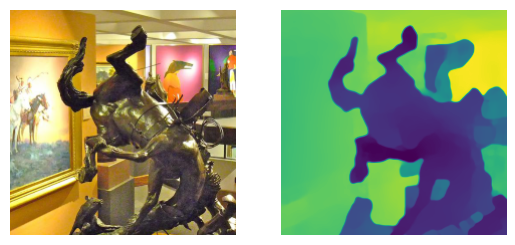

In [3]:
sample_image = transformed_dataset[150]
fig,ax = plt.subplot_mosaic("AB")
ax["A"].imshow(sample_image["mono"])
ax["B"].imshow(sample_image["heat"])

for k in ax.keys():
    ax[k].axis("off")
    ax[k].grid("off")

plt.show()



In [4]:
# now we derive n ordinal relations from these images
# we will work out one such pair of example
# since we have random cropped and returned @ 225 . we can hardcode these values for any image

# Generate a random pixel
# low and high adjusting for window size. this would be adjusted and corrected while making the loss function
pi = np.random.randint(low=50, high=175, size= 2)
pj = np.random.randint(low=50, high=175, size=2)

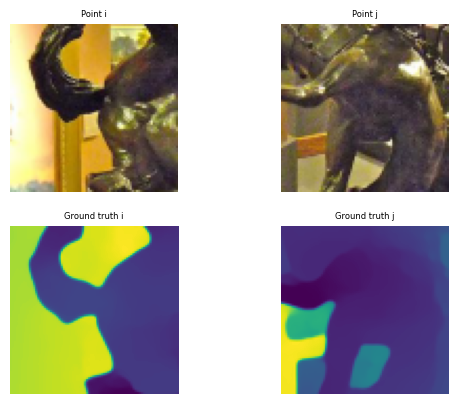

In [5]:
# window padding to get idea about the region we are going to talk about
fig , ax = plt.subplot_mosaic("AB;CD")
ax["A"].set_title("Point i",fontsize=6)
ax["A"].imshow(sample_image["mono"][pi[0]-40 : pi[0]+40 , pi[1]-40:pi[1]+40 , :])
ax["B"].set_title("Point j",fontsize=6)
ax["B"].imshow(sample_image["mono"][pj[0]-40 : pj[0]+40 , pj[1]-40:pj[1]+40 , :])
ax["C"].set_title("Ground truth i",fontsize=6)
ax["C"].imshow(sample_image["heat"][pi[0]-40 : pi[0]+40 , pi[1]-40:pi[1]+40])
ax["D"].set_title("Ground truth j",fontsize=6)
ax["D"].imshow(sample_image["heat"][pj[0]-40 : pj[0]+40 , pj[1]-40:pj[1]+40])

for k in ax.keys():
    ax[k].axis("off")
    ax[k].grid("off")


In [6]:
# lets calculate the ordinal relation of the pair of ordinal relation we are going to calculate
gi =sample_image["heat"][pi[0],pi[1]]
gj =sample_image["heat"][pj[0],pj[1]]
print(gi,gj)

0.1798663350281251 0.08230662784977966


In [7]:
def ordinal_relation(gi,gj,sigma=0.02):
    if gi/gj > 1+sigma : return +1
    if gi/gj < 1+sigma : return -1
    return 0

In [8]:
# so the boundary of our ordinal relation pair is
[ordinal_relation(101,100) , ordinal_relation(102,100) , ordinal_relation(103,100)]

[-1, 0, 1]

In [9]:
# here our ordinal relation will be 
ordinal_relation(gi,gj)

1